In [2]:
import pandas as pd
import glob
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
folder_path = 'train'
file_list = glob.glob(folder_path + "/*.txt")
main_dataframe = pd.DataFrame(pd.read_table(file_list[0]))
df = pd.DataFrame()
    
for i in range(0,len(file_list)):
    with open(file_list[i]) as f:
        lines = f.readlines()
        lines0 = [line.split()[0] for line in lines]
        lines1 = [line.split()[1:][-1] for line in lines]
        df1 = pd.DataFrame ([lines1[0:-1]], columns = lines0[0:-1])
        df = pd.concat([df, df1], ignore_index=True)
        
  
# creating a new csv file with
# the dataframe we created
df.to_csv('new_csv2.csv')

In [3]:
folder_path = 'test'
file_list = glob.glob(folder_path + "/*.txt")
main_dataframe = pd.DataFrame(pd.read_table(file_list[0]))
df = pd.DataFrame()
    
for i in range(0,len(file_list)):
    with open(file_list[i]) as f:
        lines = f.readlines()
        lines0 = [line.split()[0] for line in lines]
        lines1 = [line.split()[1:][-1] for line in lines]
        df1 = pd.DataFrame ([lines1[0:-1]], columns = lines0[0:-1])
        df = pd.concat([df, df1], ignore_index=True)
        
  
# creating a new csv file with
# the dataframe we created
df.to_csv('new_test.csv')

In [400]:
a = pd.read_csv('new_csv1.csv')

In [401]:
a.shape

(45593, 21)

In [562]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           45593 non-null  object        
 1   Delivery_person_ID           45593 non-null  object        
 2   Delivery_person_Age          45593 non-null  int32         
 3   Delivery_person_Ratings      45593 non-null  float64       
 4   Restaurant_latitude          45593 non-null  float64       
 5   Restaurant_longitude         45593 non-null  float64       
 6   Delivery_location_latitude   45593 non-null  float64       
 7   Delivery_location_longitude  45593 non-null  float64       
 8   Order_Date                   45593 non-null  datetime64[ns]
 9   Time_Orderd                  45593 non-null  object        
 10  Time_Order_picked            45593 non-null  object        
 11  Weather                      45593 non-nu

In [417]:
a

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30,11:45,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24.0
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45,19:50,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33.0
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,8:30,8:45,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26.0
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,17:60,18:10,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21.0
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30,13:45,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32.0
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36.0
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50,24:05,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16.0
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26.0


## Dropping Unnamed Column

In [404]:
a = a.drop(columns='Unnamed: 0')

## Working on Age Column

In [406]:
a['Delivery_person_Age'].unique()

array([37., 34., 23., 38., 32., 22., 33., 35., 36., 21., 24., 29., 25.,
       31., 27., 26., 20., nan, 28., 39., 30., 15., 50.])

In [407]:
round(a['Delivery_person_Age'].mean())

30

### All value of age can be converted to integer from float & Also replace nan with mean

In [408]:
a['Delivery_person_Age'] = a['Delivery_person_Age'].fillna(round(a['Delivery_person_Age'].mean()))

In [409]:
a['Delivery_person_Age'] = a['Delivery_person_Age'].astype(int)

## Working on Rating column

In [410]:
a['Delivery_person_Ratings'].unique()

array([4.9, 4.5, 4.4, 4.7, 4.6, 4.8, 4.2, 4.3, 4. , 4.1, 5. , 3.5, nan,
       3.8, 3.9, 3.7, 2.6, 2.5, 3.6, 3.1, 2.7, 1. , 3.2, 3.3, 6. , 3.4,
       2.8, 2.9, 3. ])

In [411]:
round(a['Delivery_person_Ratings'].mean(),1)

4.6

### replace nan with mean

In [412]:
a['Delivery_person_Ratings'] = a['Delivery_person_Ratings'].fillna(round(a['Delivery_person_Ratings'].mean(), 1))

In [413]:
a['Delivery_person_Ratings'].unique()

array([4.9, 4.5, 4.4, 4.7, 4.6, 4.8, 4.2, 4.3, 4. , 4.1, 5. , 3.5, 3.8,
       3.9, 3.7, 2.6, 2.5, 3.6, 3.1, 2.7, 1. , 3.2, 3.3, 6. , 3.4, 2.8,
       2.9, 3. ])

### Function to calculate difference between order_picked & time_orderd

In [5]:
def transform_time(t1,t2):
    t1= str(t1)
    t2= str(t2)
    if(":" not in t1 or ":" not in t2):
        return float('NaN')
    else:
        t1h = int(t1.split(":")[0])*60
        t1m = int(t1.split(":")[1][0:2])
        t2h = int(t2.split(":")[0])*60
        t2m = int(t2.split(":")[1][0:2])
        total_time1 = t1h+t1m
        total_time2 = t2h+t2m
        return float(total_time1 - total_time2)

In [9]:
transform_time('01:50','23:20')


-1290.0

In [416]:
str(datetime.timedelta(minutes=10))

'0:10:00'

### Applying function

In [418]:
a['orderd-to-pickup-time']=np.vectorize(transform_time)(a['Time_Order_picked'],a['Time_Orderd'])

In [419]:
a[a['orderd-to-pickup-time'].isna()]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,orderd-to-pickup-time
42,0x4f0,MUMRES17DEL02,30,4.6,19.121999,72.908493,19.201999,72.988493,06-04-2022,NaN,...,Cloudy,Medium,1,Drinks,scooter,1.0,No,Metropolitian,33.0,NaN
74,0xa9f,BANGRES13DEL01,30,4.6,12.935662,77.614130,12.975662,77.654130,11-03-2022,NaN,...,NaN,NaN,1,Drinks,scooter,0.0,No,Metropolitian,19.0,NaN
120,0x6e2,VADRES06DEL01,30,4.6,22.312790,73.170283,22.422790,73.280283,02-04-2022,NaN,...,NaN,NaN,3,Snack,electric_scooter,0.0,No,Metropolitian,25.0,NaN
140,0x1ec7,PUNERES05DEL03,30,4.6,18.543626,73.905101,18.573626,73.935101,09-03-2022,NaN,...,Stormy,Low,2,Snack,scooter,0.0,No,NaN,19.0,NaN
179,0x1b58,JAPRES03DEL01,30,4.6,26.913483,75.803139,26.983483,75.873139,12-03-2022,NaN,...,Sandstorms,Medium,0,Drinks,motorcycle,0.0,No,Metropolitian,43.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45405,0xc7ed,KNPRES20DEL03,30,4.6,26.470000,80.350000,26.610000,80.490000,12-02-2022,NaN,...,Windy,Jam,1,Drinks,scooter,1.0,No,Metropolitian,18.0,NaN
45504,0x461,BANGRES07DEL02,30,4.6,-12.978453,-77.643685,12.998453,77.663685,17-03-2022,NaN,...,NaN,NaN,3,Meal,scooter,1.0,No,NaN,24.0,NaN
45518,0x863,INDORES05DEL01,30,4.6,22.727021,75.884167,22.737021,75.894167,19-03-2022,NaN,...,NaN,NaN,3,Snack,electric_scooter,0.0,No,Metropolitian,25.0,NaN
45519,0xd0be,AGRRES07DEL01,30,4.6,27.160934,78.044095,27.170934,78.054095,13-02-2022,NaN,...,NaN,NaN,3,Meal,electric_scooter,1.0,No,Urban,17.0,NaN


In [420]:
a['orderd-to-pickup-time'].unique()

array([15.,  5., 10., nan])

### replace all nan value with mean in orderd-to-pickup-time

In [421]:
round(a['orderd-to-pickup-time'].mean())

10

In [422]:
a['orderd-to-pickup-time'] = a['orderd-to-pickup-time'].fillna(round(a['orderd-to-pickup-time'].mean()))

In [423]:
a['orderd-to-pickup-time'].unique()

array([15.,  5., 10.])

In [426]:
a[a['orderd-to-pickup-time'].isna()]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,orderd-to-pickup-time


# Transforming Time_Ordered & Time_Order_picked value

In [470]:
a['Time_Orderd'].unique()

array(['11:30', '19:45', '8:30', '17:60', '13:30', '21:20', '19:15',
       '17:25', '20:55', '21:55', '14:55', '17:30', '9:20', '19:50',
       '20:25', '20:30', '20:40', '21:15', '20:20', '22:30', '8:15',
       '19:30', '12:25', '18:35', '20:35', '23:20', '23:35', '22:35',
       '23:25', '13:35', '21:35', '18:55', '14:15', '10:60', '9:45',
       '8:40', '22:60', '18:25:00', '19:10', '10:55', '21:40', '18:60',
       '16:45', '15:10', '22:45', '22:10', '20:45', '22:50', '17:55',
       '9:25', '20:15', '22:25', '22:40', '23:50', '15:25', '10:20',
       '10:40', '15:55', '20:10', '12:10', '15:30', '10:35', '15:20:00',
       '21:10', '20:50', '12:35', '20:60', '23:40', '18:15', '18:20',
       '11:45', '12:45', '23:30', '10:50', '21:25', '10:10', '17:50',
       '22:20', '12:40', '23:55', '10:25', '8:45', '23:45', '19:55',
       '22:15', '23:10', '9:15', '18:25', '18:15:00', '18:45', '16:50',
       '23:60', '14:20', '10:15', '8:50', '8:60', '17:45', '16:35',
       '23:30:00', '2

In [469]:
a['Time_Order_picked'].unique()

array(['11:45', '19:50', '8:45', '18:10', '13:45', '21:30', '19:30',
       '17:30', '21:05', '22:10', '15:05', '17:40', '9:30', '20:05',
       '20:35', '15:10', '20:40', '20:50', '20:25', '22:45', '8:30',
       '19:45', '12:30', '18:50', '23:30', '21:35', '23:45', '22:50',
       '22:40', '23:35', '13:40', '21:45', '19:10', '14:25', '11:10',
       '9:55', '8:55', '23:10', '18:35', '19:25', '10:60', '19:15',
       '16:55', '11:40', '15:15', '22:55', '22:25', '20:55', '23:05',
       '17:60', '22:60', '9:40', '20:20', '22:35', '21:60', '23:55',
       '15:40', '10:30', '20:60', '10:50', '16:05', '20:15', '12:15',
       '15:45', '22:15', '10:45', '15:30', '24:05', '21:25', '12:45',
       '21:15', '18:20', '18:25', '11:50', '12:50', '10:55', '21:40',
       '10:20', '17:55', '23:50', '12:55', '24:10', '10:40', '8:60',
       '20:45', '19:60', '23:15', '22:20', '16:60', '24:15', '21:20',
       '14:35', '10:25', '9:05', '16:50', '8:40', '23:40', '21:50',
       '19:55', '14:60', '10:

### Finding the actual order time from order_picked_time - orderd-to-pickup-time

In [429]:
a[a['Time_Order_picked'].isna()]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,orderd-to-pickup-time


In [430]:
def transform_orderd_to_pickup_time(t):
    a = str(datetime.timedelta(minutes=t))
    return a

In [371]:
transform_orderd_to_pickup_time(690)

'11:30:00'

In [431]:
a['orderd-to-pickup-time'] = a['orderd-to-pickup-time'].apply(transform_orderd_to_pickup_time)

In [434]:
a['orderd-to-pickup-time'].unique()

array(['0:15:00', '0:05:00', '0:10:00'], dtype=object)

In [435]:
a['orderd_time_mod'] = np.vectorize(transform_time)(a['Time_Order_picked'],a['orderd-to-pickup-time'])

In [452]:
a['Time_Orderd'] = a['Time_Orderd'].fillna(a['orderd_time_mod'])

In [454]:
a[a['Time_Orderd'].isna()]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,orderd-to-pickup-time,orderd_time_mod


## Working on weather

In [459]:
a['Weather'].unique()

array(['Sunny', 'Stormy', 'Sandstorms', 'Cloudy', 'Fog', 'Windy', nan],
      dtype=object)

In [460]:
a[a['Weather'].isna()]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,orderd-to-pickup-time,orderd_time_mod
74,0xa9f,BANGRES13DEL01,30,4.6,12.935662,77.614130,12.975662,77.654130,11-03-2022,15:20:00,...,NaN,1,Drinks,scooter,0.0,No,Metropolitian,19.0,0:10:00,15:20:00
120,0x6e2,VADRES06DEL01,30,4.6,22.312790,73.170283,22.422790,73.280283,02-04-2022,18:15:00,...,NaN,3,Snack,electric_scooter,0.0,No,Metropolitian,25.0,0:10:00,18:15:00
250,0x1b50,PUNERES16DEL01,30,4.6,18.536718,73.830327,18.646718,73.940327,08-03-2022,21:15:00,...,NaN,3,Buffet,motorcycle,1.0,Yes,Urban,43.0,0:10:00,21:15:00
348,0x4c1,BANGRES13DEL02,30,4.6,12.935662,77.614130,13.065662,77.744130,02-03-2022,23:55:00,...,NaN,3,Drinks,scooter,1.0,No,Metropolitian,26.0,0:10:00,23:55:00
425,0xc003,DEHRES13DEL02,30,4.6,-30.366322,-78.070453,30.496322,78.200453,18-02-2022,22:20:00,...,NaN,3,Snack,scooter,1.0,No,Metropolitian,20.0,0:10:00,22:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45332,0x2950,VADRES04DEL02,50,6.0,0.000000,0.000000,0.020000,0.020000,19-03-2022,10:30:00,...,NaN,3,Drinks,electric_scooter,1.0,No,Urban,28.0,0:10:00,10:30:00
45394,0xdc4,RANCHIRES02DEL03,30,4.6,0.000000,0.000000,0.030000,0.030000,05-03-2022,17:15:00,...,NaN,3,Buffet,bicycle,1.0,No,Metropolitian,21.0,0:10:00,17:15:00
45504,0x461,BANGRES07DEL02,30,4.6,-12.978453,-77.643685,12.998453,77.663685,17-03-2022,9:20:00,...,NaN,3,Meal,scooter,1.0,No,NaN,24.0,0:10:00,9:20:00
45518,0x863,INDORES05DEL01,30,4.6,22.727021,75.884167,22.737021,75.894167,19-03-2022,11:30:00,...,NaN,3,Snack,electric_scooter,0.0,No,Metropolitian,25.0,0:10:00,11:30:00


In [485]:
a['Weather'].value_counts()

Fog           8270
Stormy        7586
Cloudy        7536
Sandstorms    7495
Windy         7422
Sunny         7284
Name: Weather, dtype: int64

In [482]:
a['Weather'] = a['Weather'].fillna(a['Weather'].mode()[0])

In [481]:
a['Weather'].mode()[0]

'Fog'

In [484]:
a[a['Weather'].isna()]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,orderd-to-pickup-time,orderd_time_mod


## Working on Road Traffic Density

In [487]:
a['Road_traffic_density'].unique()

array(['High', 'Jam', 'Low', 'Medium', nan], dtype=object)

In [491]:
a[a['Road_traffic_density'].isna()]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,orderd-to-pickup-time,orderd_time_mod


In [490]:
a['Road_traffic_density'] = a['Road_traffic_density'].fillna(a['Road_traffic_density'].mode()[0])

In [489]:
a['Road_traffic_density'].mode()[0]

'Low'

## Working on multiple_deliveries

In [497]:
a['multiple_deliveries'].unique()

array([ 0.,  1.,  3., nan,  2.])

In [498]:
a['multiple_deliveries'].mode()[0]

1.0

In [501]:
a[a['multiple_deliveries'].isna()]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,orderd-to-pickup-time,orderd_time_mod


In [500]:
a['multiple_deliveries'] = a['multiple_deliveries'].fillna(a['multiple_deliveries'].mode()[0])

## Working on multiple_deliveries

In [504]:
a['Festival'].unique()

array(['No', 'Yes', nan], dtype=object)

In [505]:
a['Festival'].mode()[0]

'No'

In [508]:
a[a['Festival'].isna()]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,orderd-to-pickup-time,orderd_time_mod


In [507]:
a['Festival'] = a['Festival'].fillna(a['Festival'].mode()[0])

## Distance  calculation using latitude and longitude

In [561]:
a

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,orderd-to-pickup-time,orderd_time_mod,total_distance
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30,...,2,Snack,motorcycle,0.0,No,Urban,24.0,0:15:00,11:30:00,3.025154
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45,...,2,Snack,scooter,1.0,No,Metropolitian,33.0,0:05:00,19:45:00,20.183558
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,8:30,...,0,Drinks,motorcycle,1.0,No,Urban,26.0,0:15:00,8:30:00,1.552760
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-05-04,17:60,...,0,Buffet,motorcycle,1.0,No,Metropolitian,21.0,0:10:00,18:00:00,7.790412
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30,...,1,Snack,scooter,1.0,No,Metropolitian,30.0,0:15:00,13:30:00,6.210147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35,...,1,Meal,motorcycle,0.0,No,Metropolitian,32.0,0:10:00,11:35:00,1.489848
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55,...,0,Buffet,motorcycle,1.0,No,Metropolitian,36.0,0:15:00,19:55:00,11.007750
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-11-03,23:50,...,1,Drinks,scooter,0.0,No,Metropolitian,16.0,0:15:00,23:50:00,4.657202
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-07-03,13:35,...,0,Snack,motorcycle,1.0,No,Metropolitian,26.0,0:05:00,13:35:00,6.232402


In [547]:
pip install geopy

You should consider upgrading via the 'C:\Users\ssaur\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.



     -------------------------------------- 118.9/118.9 KB 1.4 MB/s eta 0:00:00


In [548]:
import geopy.distance

coords_1 = (52.2296756, 21.0122287)
coords_2 = (52.406374, 16.9251681)

print(geopy.distance.geodesic(coords_1, coords_2).km)

279.35290160430094


In [554]:
def calculate_dist_lat_long(la1,lo1,la2,lo2):
    coords_1 = (la1, lo1)
    coords_2 = (la2, lo2)
    return geopy.distance.great_circle(coords_1, coords_2).km
    

In [557]:
a['total_distance']=np.vectorize(calculate_dist_lat_long)(a['Restaurant_latitude'],a['Restaurant_longitude'],a['Delivery_location_latitude'],a['Delivery_location_longitude'])

## Working with order date

In [560]:
# Converting to datetime datatype
a['Order_Date'] = pd.to_datetime(a['Order_Date'])

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-03-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '25-03-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-03-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\p

In [563]:
a['Order_Date'].unique()

array(['2022-03-19T00:00:00.000000000', '2022-03-25T00:00:00.000000000',
       '2022-05-04T00:00:00.000000000', '2022-03-26T00:00:00.000000000',
       '2022-11-03T00:00:00.000000000', '2022-04-03T00:00:00.000000000',
       '2022-03-14T00:00:00.000000000', '2022-03-20T00:00:00.000000000',
       '2022-12-02T00:00:00.000000000', '2022-02-13T00:00:00.000000000',
       '2022-02-14T00:00:00.000000000', '2022-02-04T00:00:00.000000000',
       '2022-01-03T00:00:00.000000000', '2022-03-16T00:00:00.000000000',
       '2022-02-15T00:00:00.000000000', '2022-10-03T00:00:00.000000000',
       '2022-03-27T00:00:00.000000000', '2022-12-03T00:00:00.000000000',
       '2022-01-04T00:00:00.000000000', '2022-05-03T00:00:00.000000000',
       '2022-11-02T00:00:00.000000000', '2022-08-03T00:00:00.000000000',
       '2022-03-04T00:00:00.000000000', '2022-03-30T00:00:00.000000000',
       '2022-03-28T00:00:00.000000000', '2022-03-18T00:00:00.000000000',
       '2022-06-04T00:00:00.000000000', '2022-04-04

In [573]:
a['Delivery_person_ID'].unique()

array(['INDORES13DEL02', 'BANGRES18DEL02', 'BANGRES19DEL01', ...,
       'KOCRES04DEL01', 'BHPRES06DEL03', 'GOARES03DEL03'], dtype=object)

In [509]:
a.to_csv('final1.csv')

In [510]:
a

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,orderd-to-pickup-time,orderd_time_mod
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30,...,High,2,Snack,motorcycle,0.0,No,Urban,24.0,0:15:00,11:30:00
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45,...,Jam,2,Snack,scooter,1.0,No,Metropolitian,33.0,0:05:00,19:45:00
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,8:30,...,Low,0,Drinks,motorcycle,1.0,No,Urban,26.0,0:15:00,8:30:00
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,17:60,...,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21.0,0:10:00,18:00:00
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30,...,High,1,Snack,scooter,1.0,No,Metropolitian,30.0,0:15:00,13:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35,...,High,1,Meal,motorcycle,0.0,No,Metropolitian,32.0,0:10:00,11:35:00
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55,...,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36.0,0:15:00,19:55:00
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50,...,Low,1,Drinks,scooter,0.0,No,Metropolitian,16.0,0:15:00,23:50:00
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35,...,High,0,Snack,motorcycle,1.0,No,Metropolitian,26.0,0:05:00,13:35:00


In [511]:
a.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,29.584739,4.632367,17.017729,70.231332,17.465186,70.845702,1.023359,0.750225,26.294607
std,5.696333,0.327708,8.185109,22.883647,7.335122,21.118812,0.839065,0.567430,9.383806
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.546947,75.898497,18.633934,76.002574,1.000000,1.000000,26.000000
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [513]:
a.duplicated().sum()

0

In [564]:
a.corr()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken,total_distance
Delivery_person_Age,1.000000,-0.068159,-0.005931,-0.009960,0.002501,-0.000403,0.004788,0.111274,0.292861,0.023547
Delivery_person_Ratings,-0.068159,1.000000,-0.004846,-0.011147,-0.010198,-0.013350,0.030920,-0.113366,-0.331103,-0.006230
Restaurant_latitude,-0.005931,-0.004846,1.000000,0.661784,0.866378,0.602713,-0.033551,0.007783,0.013981,-0.369276
Restaurant_longitude,-0.009960,-0.011147,0.661784,1.000000,0.632293,0.915026,-0.038744,0.004166,0.007821,-0.354461
Delivery_location_latitude,0.002501,-0.010198,0.866378,0.632293,1.000000,0.690515,-0.001604,0.009910,0.014243,0.029975
Delivery_location_longitude,-0.000403,-0.013350,0.602713,0.915026,0.690515,1.000000,-0.001960,0.004657,0.007625,0.027160
Vehicle_condition,0.004788,0.030920,-0.033551,-0.038744,-0.001604,-0.001960,1.000000,-0.095592,-0.234398,0.092366
multiple_deliveries,0.111274,-0.113366,0.007783,0.004166,0.009910,0.004657,-0.095592,1.000000,0.378276,0.000841
Time_taken,0.292861,-0.331103,0.013981,0.007821,0.014243,0.007625,-0.234398,0.378276,1.000000,-0.002508
total_distance,0.023547,-0.006230,-0.369276,-0.354461,0.029975,0.027160,0.092366,0.000841,-0.002508,1.000000


In [520]:
a.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,orderd-to-pickup-time,orderd_time_mod
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30,...,High,2,Snack,motorcycle,0.0,No,Urban,24.0,0:15:00,11:30:00
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45,...,Jam,2,Snack,scooter,1.0,No,Metropolitian,33.0,0:05:00,19:45:00
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,8:30,...,Low,0,Drinks,motorcycle,1.0,No,Urban,26.0,0:15:00,8:30:00
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,17:60,...,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21.0,0:10:00,18:00:00
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30,...,High,1,Snack,scooter,1.0,No,Metropolitian,30.0,0:15:00,13:30:00


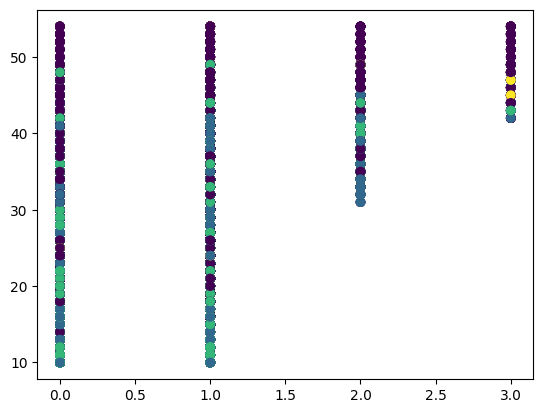

In [525]:
plt.scatter(a['multiple_deliveries'],a['Time_taken'],c= a['Vehicle_condition']	)

In [531]:
a['Vehicle_condition'].value_counts()

2    15034
1    15030
0    15009
3      520
Name: Vehicle_condition, dtype: int64

(array([15009.,     0.,     0., 15030.,     0.,     0., 15034.,     0.,
            0.,   520.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

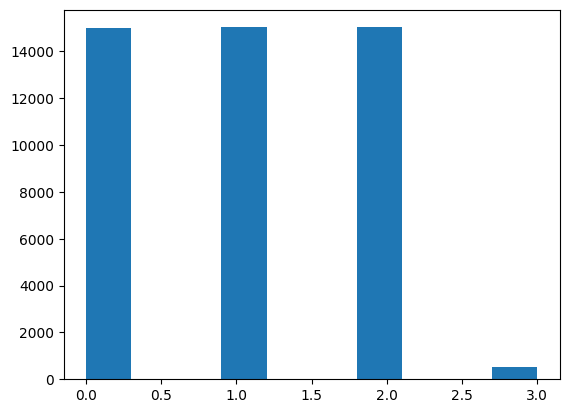

In [528]:
plt.hist(a['Vehicle_condition'])

In [534]:
a['Delivery_person_Ratings'].unique()

array([4.9, 4.5, 4.4, 4.7, 4.6, 4.8, 4.2, 4.3, 4. , 4.1, 5. , 3.5, 3.8,
       3.9, 3.7, 2.6, 2.5, 3.6, 3.1, 2.7, 1. , 3.2, 3.3, 6. , 3.4, 2.8,
       2.9, 3. ])

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Festival', ylabel='Time_taken'>

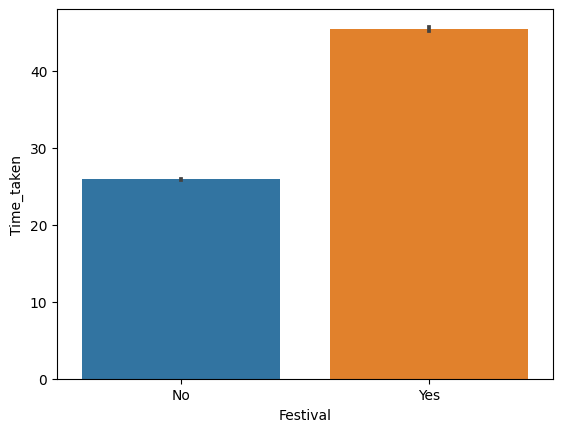

In [535]:
sns.barplot(a['Festival'],a['Time_taken'])

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City', ylabel='Time_taken'>

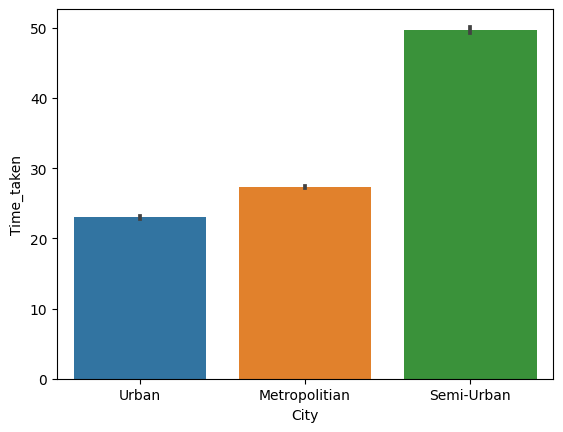

In [536]:
sns.barplot(a['City'],a['Time_taken'])

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type_of_vehicle', ylabel='Time_taken'>

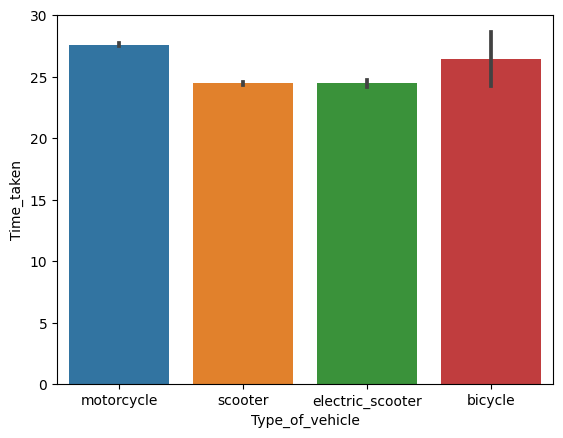

In [537]:
sns.barplot(a['Type_of_vehicle'],a['Time_taken'])

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type_of_order', ylabel='Time_taken'>

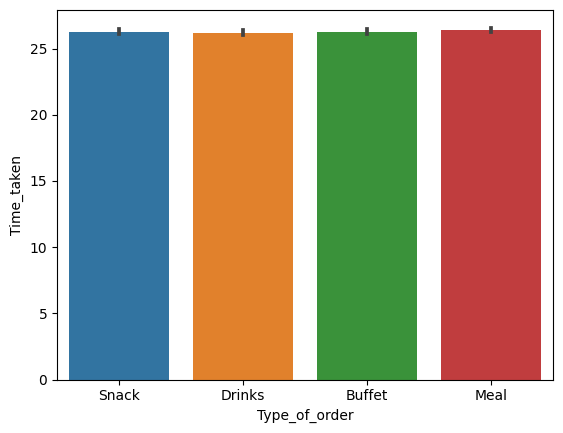

In [538]:
sns.barplot(a['Type_of_order'],a['Time_taken'])

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vehicle_condition', ylabel='Time_taken'>

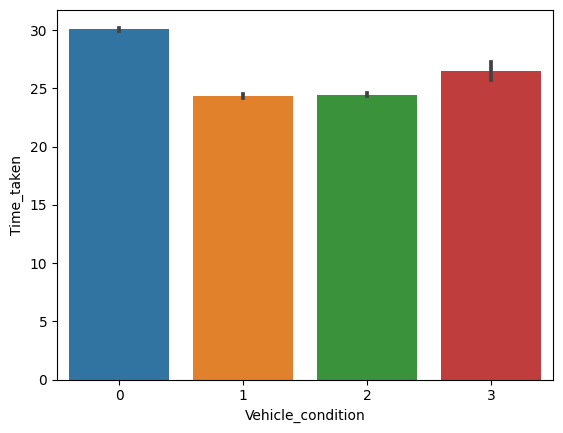

In [566]:
sns.barplot(a['Vehicle_condition'],a['Time_taken'])

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='multiple_deliveries', ylabel='Time_taken'>

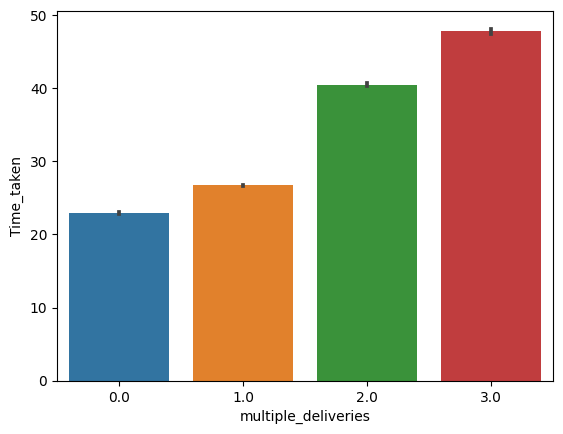

In [587]:
sns.barplot(a['multiple_deliveries'],a['Time_taken'])

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weather', ylabel='Time_taken'>

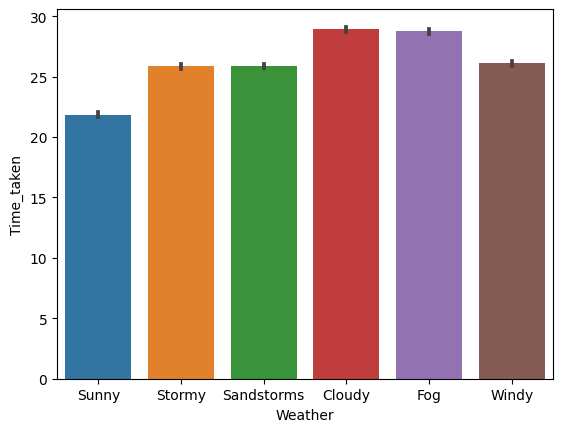

In [565]:
sns.barplot(a['Weather'],a['Time_taken'])

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Festival', ylabel='Time_taken'>

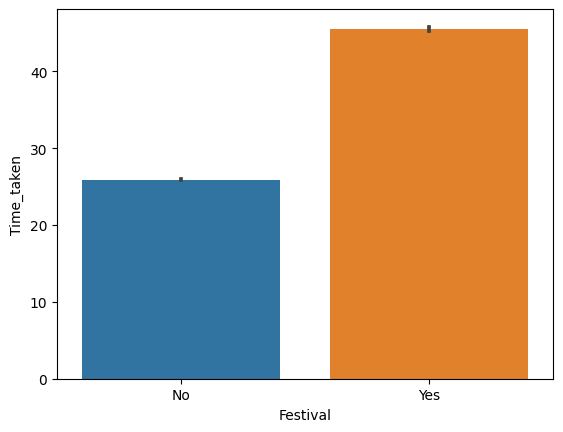

In [588]:
sns.barplot(a['Festival'],a['Time_taken'])

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City', ylabel='Time_taken'>

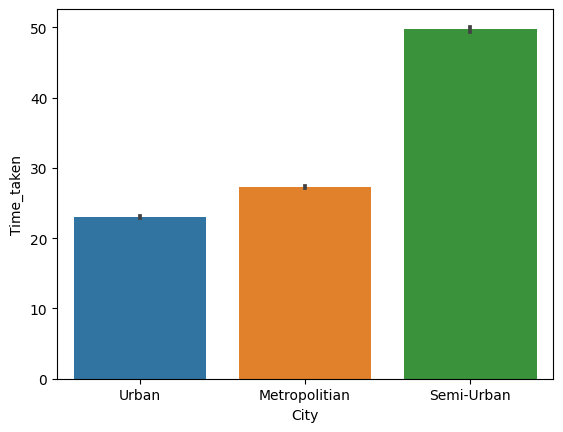

In [589]:
sns.barplot(a['City'],a['Time_taken'])

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type_of_order', ylabel='orderd-to-pickup-time'>

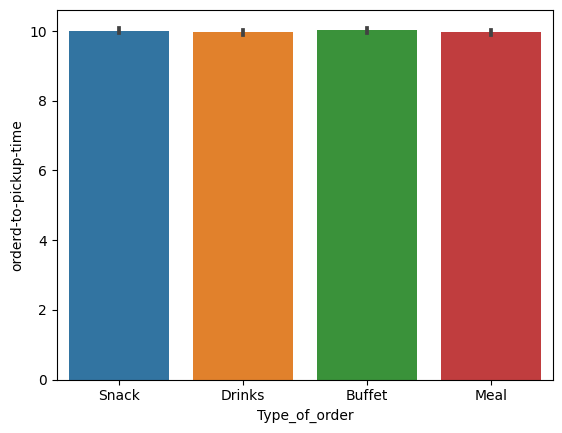

In [586]:
sns.barplot(a['Type_of_order'],a['orderd-to-pickup-time'].str.split(":").str.get(1).astype(int))

In [585]:
a['orderd-to-pickup-time'].str.split(":").str.get(1).astype(int)

0        15
1         5
2        15
3        10
4        15
         ..
45588    10
45589    15
45590    15
45591     5
45592     5
Name: orderd-to-pickup-time, Length: 45593, dtype: int32

In [567]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           45593 non-null  object        
 1   Delivery_person_ID           45593 non-null  object        
 2   Delivery_person_Age          45593 non-null  int32         
 3   Delivery_person_Ratings      45593 non-null  float64       
 4   Restaurant_latitude          45593 non-null  float64       
 5   Restaurant_longitude         45593 non-null  float64       
 6   Delivery_location_latitude   45593 non-null  float64       
 7   Delivery_location_longitude  45593 non-null  float64       
 8   Order_Date                   45593 non-null  datetime64[ns]
 9   Time_Orderd                  45593 non-null  object        
 10  Time_Order_picked            45593 non-null  object        
 11  Weather                      45593 non-nu

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Time_taken'>

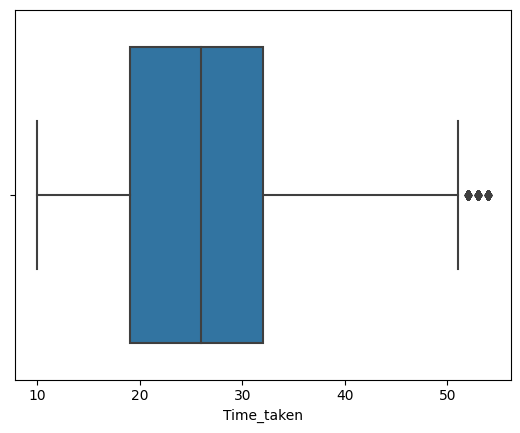

In [542]:
sns.boxplot(a['Time_taken'])

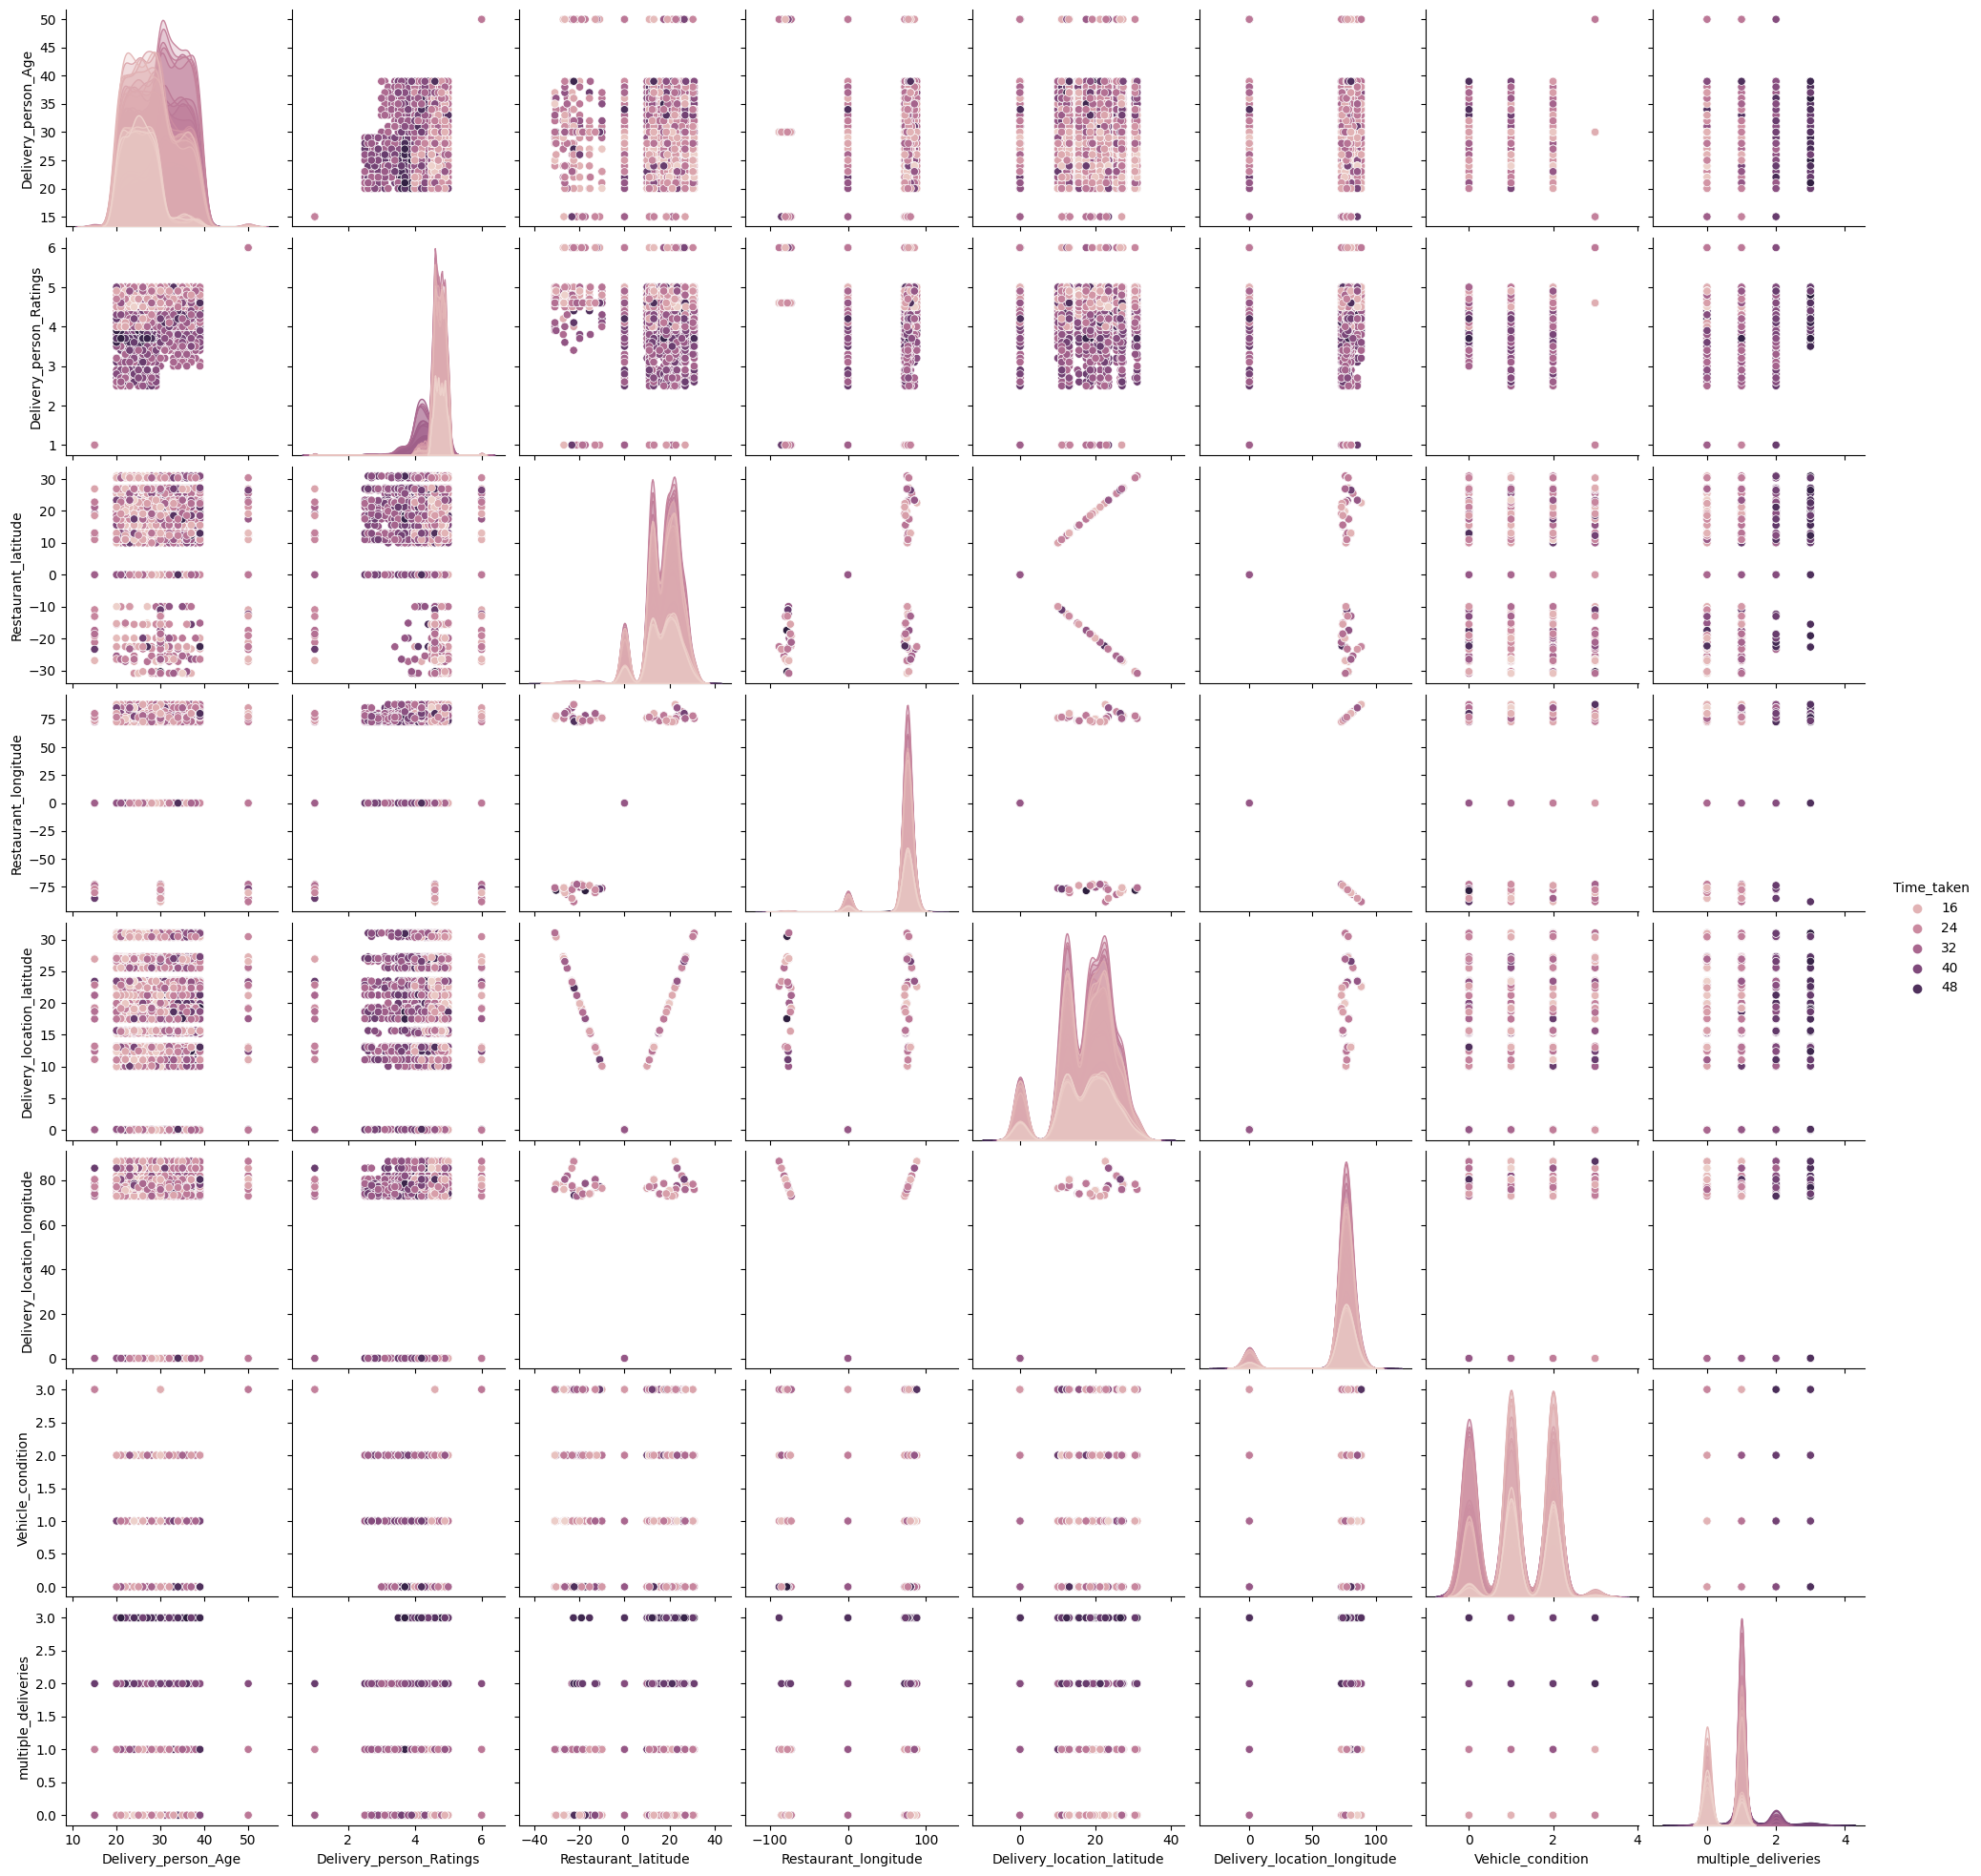

In [545]:
sns.pairplot(a,hue="Time_taken")

In [ ]:
import googlemaps
API_key = ''
gmaps = googlemaps.Client(key=API_key)
def google_calculate_dist_lat_long(la1,lo1,la2,lo2):
    print(la1,lo1,la2,lo2)
    coords_1 = (la1, lo1)
    coords_2 = (la2, lo2)
    a = gmaps.distance_matrix(coords_1, coords_2, mode='driving')["rows"][0]["elements"][0]
    if(a["status"]!='ZERO_RESULTS'):
        result = a["distance"]["value"]/1000
        return result
    else:
        return float('NaN')